In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data = pd.read_csv("DataCO2.csv")
data

,Nama,Model,Volume,Bobot,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [3]:
data.dtypes

Nama      object
Model     object
Volume     int64
Bobot      int64
CO2        int64
dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder

le_nama = LabelEncoder()
le_model = LabelEncoder()

data['Nama'] = le_nama.fit_transform(data['Nama'])
data['Model'] = le_model.fit_transform(data['Model'])
data.dtypes

Nama      int32
Model     int32
Volume    int64
Bobot     int64
CO2       int64
dtype: object

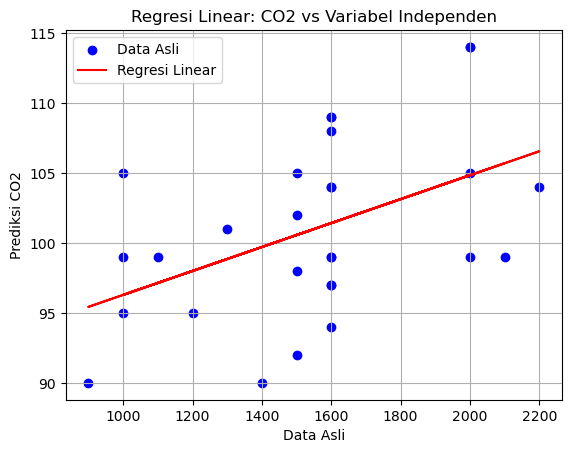

Mean Squared Error (MSE) pada data uji: 57.016369566968265
Root Mean Squared Error (RMSE) pada data uji: 7.550918458503459
Mean Absolute Error (MAE) pada data uji: 6.447538860103627
R-squared (R2) pada data uji: 0.3416836275868719
Koefisien (slope): [0.00854922]
Intercept: 87.73834196891191


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Asumsikan data Anda sudah ada dalam DataFrame bernama `data`

# Memisahkan variabel independen dan dependen
X = data[['Volume']].values      #untuk jumlah
y = data['CO2'].values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model_linear = LinearRegression()

# Melatih model
model_linear.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_test = model_linear.predict(X_test)

# Visualisasi hasil regresi linear pada seluruh dataset
plt.scatter(X_train, y_train, color='blue', label='Data Asli')  # menggunakan y untuk scatter
plt.plot(X_train, model_linear.predict(X_train), color='red', label='Regresi Linear')
plt.title('Regresi Linear: CO2 vs Variabel Independen')
plt.xlabel('Data Asli')
plt.ylabel('Prediksi CO2')
plt.legend()
plt.grid(True)
plt.show()

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error
rmse = np.sqrt(mse)   # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred_test)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred_test)   # R-squared

# Output hasil
print("Mean Squared Error (MSE) pada data uji:", mse)
print("Root Mean Squared Error (RMSE) pada data uji:", rmse)
print("Mean Absolute Error (MAE) pada data uji:", mae)
print("R-squared (R2) pada data uji:", r2)
print("Koefisien (slope):", model_linear.coef_)
print("Intercept:", model_linear.intercept_)